In [32]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

### 데이터 불러오기

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#read the file
train_diff152 = pd.read_csv('/content/drive/MyDrive/일반화선형모형/train_diff152.csv')
vali_diff152 = pd.read_csv('/content/drive/MyDrive/일반화선형모형/vali_diff152.csv')
test_diff152 = pd.read_csv('/content/drive/MyDrive/일반화선형모형/test_diff152.csv')

In [ ]:
train_diff152.columns

Index(['일자', '대여수', '일최고기온', '일최저기온', '습도', '강수확률', '풍속'], dtype='object')

In [ ]:
new_train152 = pd.concat([train_diff152, vali_diff152])
#new_val152 =  vali_diff152.iloc[120:]
new_test152 = test_diff152

In [ ]:
new_train152 = new_train152.set_index('일자')
#new_val152 = new_val152.set_index('일자')
new_test152 = new_test152.set_index('일자')

In [ ]:
new_train152

,대여수,일최고기온,일최저기온,습도,강수확률,풍속
일자,,,,,,
2019-06-08,24.0,-2.947368,-2.947368,18.277027,33.716216,0.073649
2019-06-09,-192.0,-4.052632,-4.052632,10.743243,20.067568,0.365541
2019-06-10,-49.0,-2.631579,-2.631579,0.743243,-8.648649,-0.458784
2019-06-11,10.0,-0.947368,-0.947368,-3.547297,-19.189189,-0.346622
2019-06-12,25.0,0.736842,0.736842,-2.331081,-32.702703,-1.451351
...,...,...,...,...,...,...
2021-05-27,89.0,-0.157895,-0.625000,-0.540541,4.527027,0.520270
2021-05-28,-7.0,-0.263158,-0.375000,-1.283784,10.608108,-0.070946
2021-05-29,-498.0,1.210526,0.750000,6.148649,15.067568,-0.408784


### 스케일링

In [ ]:
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

scaled_train = scaler.fit_transform(new_train152)
#scaled_vali = scaler.transform(new_val152)
scaled_test = scaler.transform(new_test152)

In [ ]:
scaled_train

array([[0.48700866, 0.31791908, 0.36645352, 0.76644295, 0.77519011,
        0.4822749 ],
       [0.3431046 , 0.27745665, 0.32513527, 0.66666667, 0.67918251,
        0.50052816],
       [0.43837442, 0.32947977, 0.37825873, 0.53422819, 0.47718631,
        0.44897959],
       ...,
       [0.13924051, 0.47013487, 0.5046729 , 0.60581655, 0.64401141,
        0.45210631],
       [0.33311126, 0.5433526 , 0.61214953, 0.59821029, 0.63498099,
        0.451219  ],
       [0.40972685, 0.58766859, 0.67757009, 0.57136465, 0.55161597,
        0.41264207]])

In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR

forecasting_model = VAR(scaled_train)
results_aic = []
for p in range(1,20):
  results = forecasting_model.fit(p)
  results_aic.append(results.aic)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


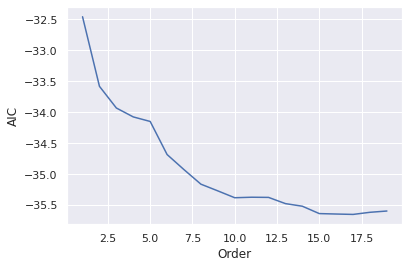

In [ ]:
import seaborn as sns
sns.set()
plt.plot(list(np.arange(1,20,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

In [ ]:
results = forecasting_model.fit(15)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 06, Dec, 2021
Time:                     11:34:54
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -32.1181
Nobs:                     708.000    HQIC:                  -34.2773
Log likelihood:           7133.72    FPE:                3.36455e-16
AIC:                     -35.6366    Det(Omega_mle):     1.62872e-16
--------------------------------------------------------------------
Results for equation y1
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const          0.650856         0.111185            5.854           0.000
L1.y1          0.248531         0.041139            6.041           0.000
L1.y2          0.140386         0.089193            1.574           0.115
L1.y3          0.

In [ ]:
laaged_values = scaled_train[-15:]
forecast = pd.DataFrame(results.forecast(y= laaged_values, steps=30), index = new_test152.index, columns= ['대여수','일최고기온', '일최저기온', '습도', '강수확률', '풍속'])
forecast

,대여수,일최고기온,일최저기온,습도,강수확률,풍속
일자,,,,,,
2021-06-01,0.588782,0.564256,0.624472,0.574839,0.569508,0.406396
2021-06-02,0.608337,0.522593,0.593741,0.585976,0.555751,0.410149
2021-06-03,0.416115,0.507354,0.559547,0.574844,0.501287,0.431902
2021-06-04,0.502601,0.463309,0.525723,0.562696,0.486916,0.450014
2021-06-05,0.659371,0.386503,0.476539,0.489402,0.461251,0.447556
2021-06-06,0.534658,0.357115,0.370212,0.462422,0.491898,0.457386
2021-06-07,0.500319,0.379581,0.368994,0.451109,0.542170,0.511509
2021-06-08,0.387227,0.428915,0.430346,0.417532,0.505416,0.543263
2021-06-09,0.453458,0.423663,0.442084,0.425199,0.508492,0.530389


In [ ]:
inverse_forcast = pd.DataFrame(scaler.inverse_transform(forecast))[0]

In [ ]:
raw_vali = pd.read_csv('/content/drive/MyDrive/일반화선형모형/vali_152.csv')
raw_test = pd.read_csv('/content/drive/MyDrive/일반화선형모형/test_152.csv')

15
30
227.62159774165013
277.44723804114744


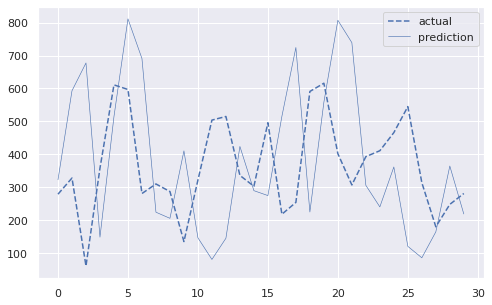

In [ ]:
first= inverse_forcast[0:15].to_list() + raw_vali[-15:].대여수 # 내가 알고 있는 valid + 차분
print(len(first)) 

first = first.append(inverse_forcast[15:30].to_list() + first[0:15]) # 예측 된 것 + 차분
print(len(first)) # 30

final_data= pd.DataFrame(first).reset_index().drop(['index'],axis=1) # 되돌린 최종데이터

print(abs(raw_test.대여수 - final_data.대여수).mean()) #mae
print(np.sqrt((raw_test.대여수 - final_data.대여수).pow(2).mean())) # rmse

plt.figure(figsize=(8,5))
plt.plot(raw_test.대여수.to_list(), '--')
plt.plot(final_data.대여수, 'b', linewidth=0.6)

plt.legend(['actual', 'prediction'])
plt.show()